<a href="https://colab.research.google.com/github/martanascimento1/datascience1/blob/main/decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree:
1- classification;
2- regression;



In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

Loading the database:

In [8]:
df_diabetes = pd.read_csv('/content/sample_data/diabetes.csv')


In [9]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Dividing the data into training and testing:

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_diabetes.drop('Outcome', axis=1), df_diabetes['Outcome'],test_size=0.3)

Checking the shape of the data:

In [12]:
x_train.shape,x_test.shape

((537, 8), (231, 8))

In [13]:
y_train.shape,y_test.shape

((537,), (231,))

Instantiating the classifier object:

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

Classifier parameters:


*   Criterion: division quality measure
*   splitter: strategy used to split the decision node
*   max_depth: maximum tree depth
*   min_samples_split: minimum number of samples to consider a node for splitting
*   min_samples_leaf: number of minimum samples at leaf level



Training the decision tree model:

In [15]:
clf = clf.fit(x_train,y_train)

Checking the most important features for the trained model:

In [16]:
clf.feature_importances_

array([0.03808943, 0.37072162, 0.12339349, 0.06641919, 0.04533454,
       0.14861229, 0.11862643, 0.08880302])

In [17]:

clf = clf.fit(x_train, y_train)
for feature, importancia in zip(df_diabetes.columns, clf.feature_importances_):
    print("{}={}".format(feature, importancia))

Pregnancies=0.03352598354115315
Glucose=0.3637192053675973
BloodPressure=0.11839032736969432
SkinThickness=0.06567540631324144
Insulin=0.04365185624390337
BMI=0.15980990848002605
DiabetesPedigreeFunction=0.1292584288165274
Age=0.08596888386785699


In [18]:
resultado = clf.predict(x_test)
resultado

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0])

In [19]:
from sklearn import metrics
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       157
           1       0.51      0.57      0.54        74

    accuracy                           0.68       231
   macro avg       0.64      0.65      0.65       231
weighted avg       0.69      0.68      0.69       231



Rendering the tree graphically:

In [20]:
!pip install ipywidgets
!pip install graphviz
!pip install pydot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.5 MB/s eta 0:00:00


In [21]:
import pydot
import graphviz

In [ ]:
dot_data = export_graphviz(
         clf,
         out_file=None,
         feature_names = df_diabetes.drop('Outcome', axis=1).columns,
         class_names=['0','1'],
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=True,
         label='all',
         special_characters=True
)
graph = graphviz.Source(dot_data)
graph

rendering the tree interactively:

In [24]:
from ipywidgets import interactive
from IPython.display import  SVG,display
from graphviz import Source
from sklearn.tree import export_graphviz

In [28]:

x, y = df_diabetes.drop('Outcome', axis=1), df_diabetes['Outcome']

features_label = df_diabetes.drop('Outcome', axis=1).columns
class_label = ['0','1']

def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
        random_state=0,
        criterion=crit,
        splitter=split,
        max_depth=depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )

    estimator.fit(x, y)
    graph = Source(export_graphviz(estimator,
      out_file=None,
      feature_names=features_label,
      class_names=class_label, # Added missing comma
      impurity = True,
      filled = True ))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter = interactive(plot_tree, # Moved interactive call outside of the function
                   crit = ['gini', 'entropy'],
                   split = ['best', 'random'],
                   depth=[1,2,3,4,5,10,20,30],
                   min_samples_split=(1, 5),
                   min_samples_leaf=(1, 5))

display(inter) # Now correctly indented outside the function

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

Visualizing the borders created by the tree:

In [37]:
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [38]:
def vizualize_fronteiras(min_samples_split,max_depth):
    x = df_diabetes [['Glucose', 'Insulin']].values
    y = df_diabetes.Outcome.values
    clf = DecisionTreeClassifier(min_samples_split=min_samples_split, max_depth=max_depth)
    tree = clf.fit(x, y)
    plt.figure(figsize=(16, 9))
    plot_decision_regions(x, y, clf=tree, legend=2)
    plt.xlabel('Glucose')
    plt.ylabel('Insulin')
    plt.title('Decision Tree')
    plt.show()

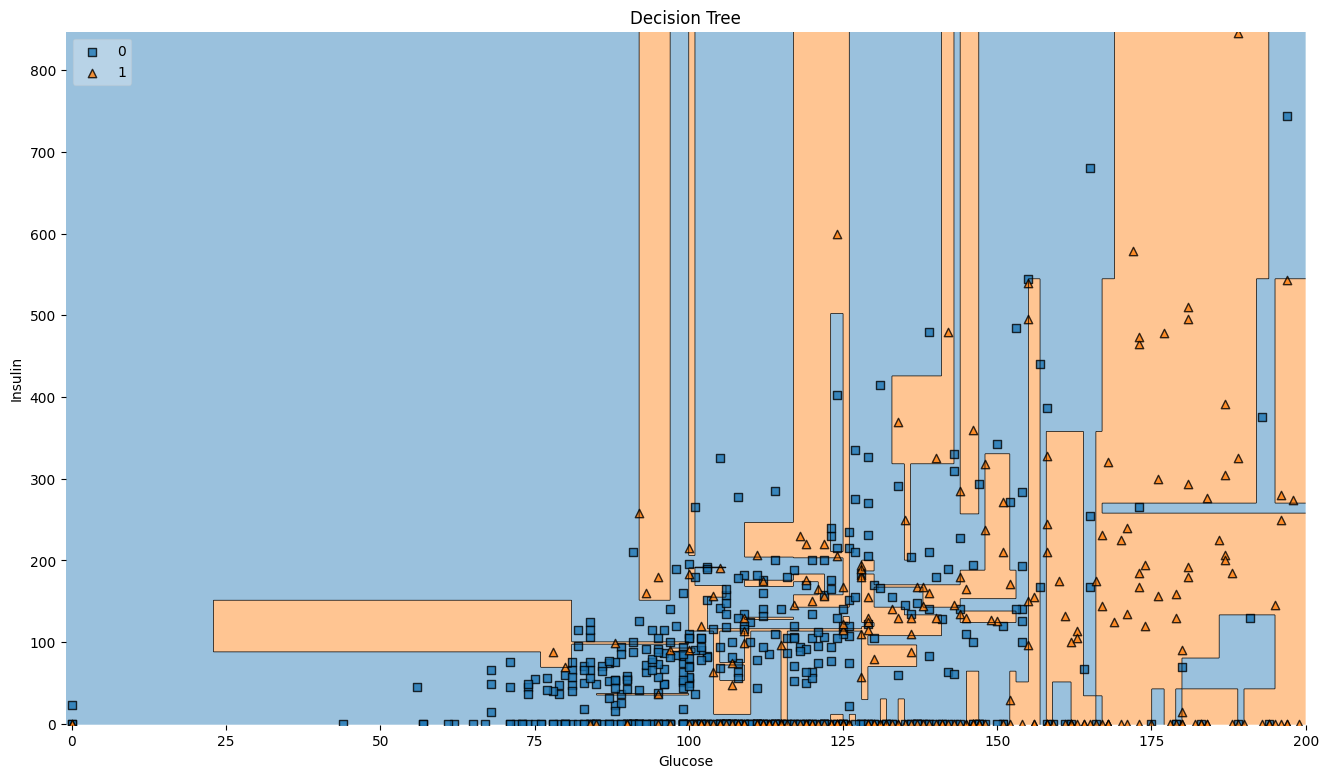

In [39]:
vizualize_fronteiras(2, max_depth=30)

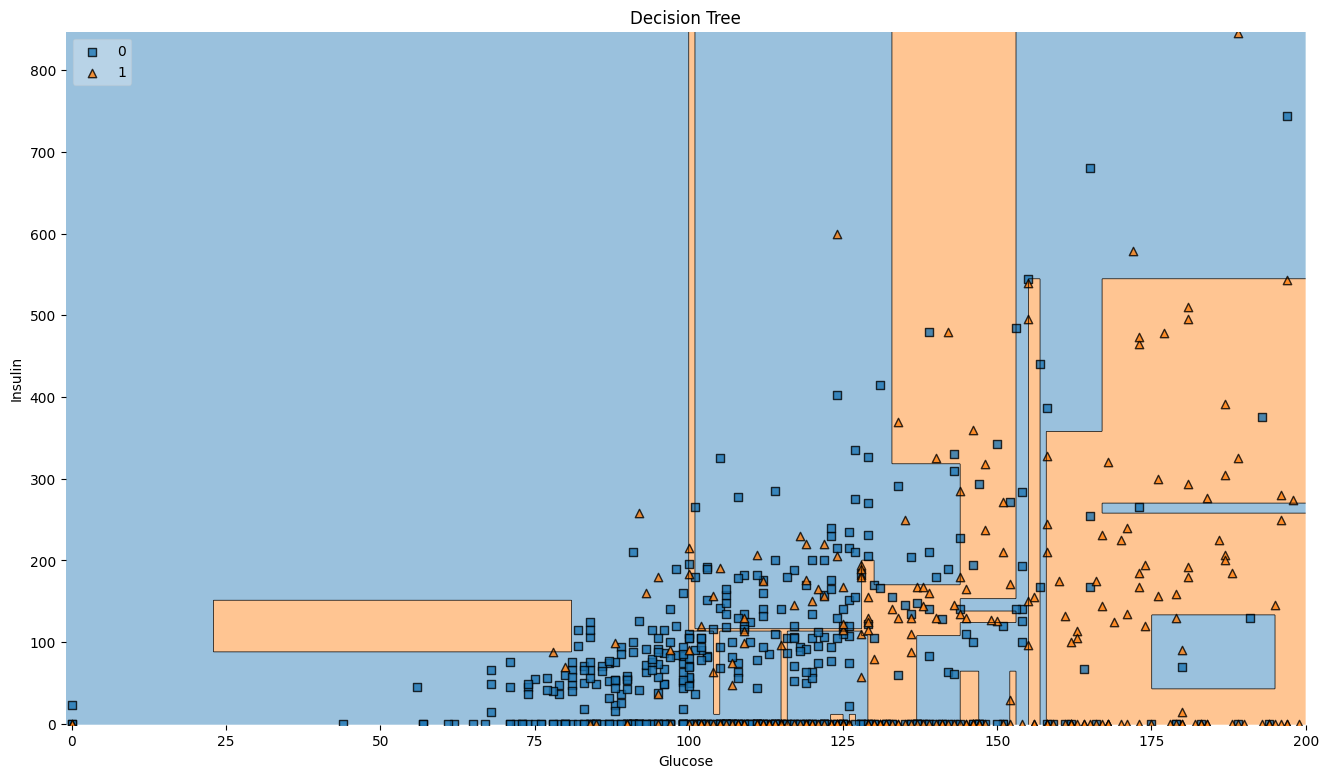

In [40]:
vizualize_fronteiras(10, max_depth=8)

Navigating the decision tree structure:

In [44]:
estimator = DecisionTreeClassifier(max_depth=3, min_samples_split =2, min_samples_leaf=2)
estimator.fit(x, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [45]:
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

In [46]:
print("numero de nós: {}".format(n_nodes))

numero de nós: 15
